https://kaggle-kr.tistory.com/17?category=868316

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')
sns.set(font_scale=2.5) # font 스타일 기본 지정

In [3]:
#null 데이터 관리 편하게
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

### < Process >    
1. 데이터셋 확인 - null 데이터     
2. 탐색적 데이터 분석(exploratory data analysis) - 여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인한다.     
3. feature engineering - feature 스케일링 (원-핫 인코딩, 클래스 나누기, 구간 나누기, 텍스트 데이터 처리)    
4. model 만들기 - sklearn 사용      
5. 모델 학습 및 예측    
6. 모델 평가 - 예측 성능의 원하는 수준 확인   

# 1. Data

In [4]:
df_train = pd.read_csv(r"C:\Users\이혜지\_Study\NunNu\week1/train.csv")
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 traget label 은 Survived 입니다

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 1.1 Null data check

In [8]:
for col in df_train.columns :
    msg = 'column : {:>10}/t Percent of Nan value : {:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column : PassengerId/t Percent of Nan value : 0.00%
column :   Survived/t Percent of Nan value : 0.00%
column :     Pclass/t Percent of Nan value : 0.00%
column :       Name/t Percent of Nan value : 0.00%
column :        Sex/t Percent of Nan value : 0.00%
column :        Age/t Percent of Nan value : 19.87%
column :      SibSp/t Percent of Nan value : 0.00%
column :      Parch/t Percent of Nan value : 0.00%
column :     Ticket/t Percent of Nan value : 0.00%
column :       Fare/t Percent of Nan value : 0.00%
column :      Cabin/t Percent of Nan value : 77.10%
column :   Embarked/t Percent of Nan value : 0.22%


In [9]:
for col in df_test.columns :
    msg = 'column : {:>10}/t Percent Of Nan: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/ df_test[col].shape[0]))
    print(msg)

column : PassengerId/t Percent Of Nan: 0.00%
column :     Pclass/t Percent Of Nan: 0.00%
column :       Name/t Percent Of Nan: 0.00%
column :        Sex/t Percent Of Nan: 0.00%
column :        Age/t Percent Of Nan: 20.57%
column :      SibSp/t Percent Of Nan: 0.00%
column :      Parch/t Percent Of Nan: 0.00%
column :     Ticket/t Percent Of Nan: 0.00%
column :       Fare/t Percent Of Nan: 0.24%
column :      Cabin/t Percent Of Nan: 78.23%
column :   Embarked/t Percent Of Nan: 0.00%


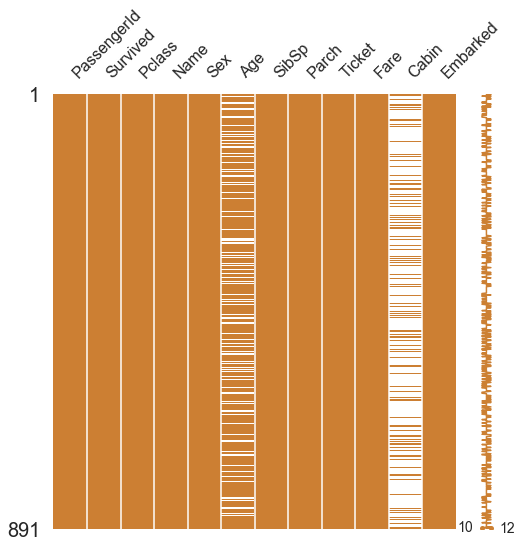

In [10]:
msno.matrix(df = df_train.iloc[:, :],figsize=(8,8),color = (0.8,0.5,0.2))

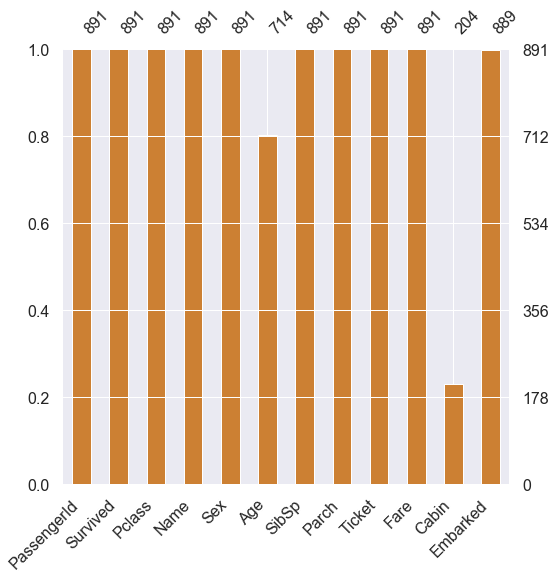

In [11]:
msno.bar(df = df_train.iloc[:,:], figsize = (8,8),color = (0.8,0.5,0.2))

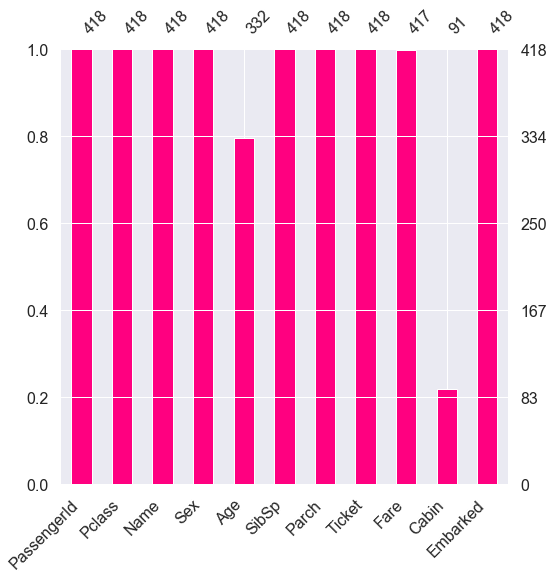

In [12]:
msno.bar(df = df_test.iloc[:,:],figsize = (8,8),color = (1,0,0.5))

=> Age, Cabin 에서 null 데이터 확인, Embarked는 낮은 수치

## 1.2 Target label 확인

* Target label이 어떤 distribution 을 가지고 있는 지 확인   
* 지금 같은 bibary classification 문제의 경우에서 1과 0의 분포에 따라 모델의 평가 방법 이 달라질 수 있음

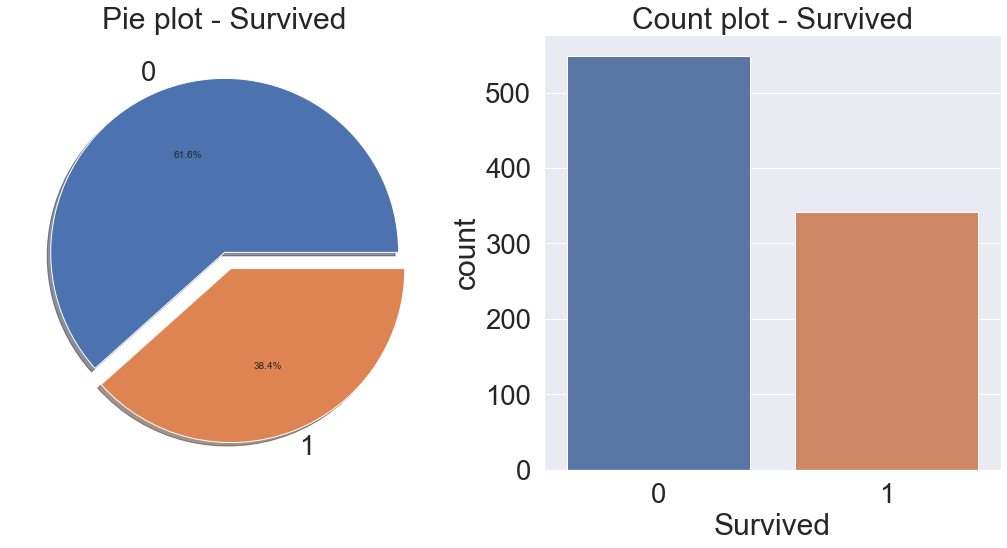

In [13]:
f, ax = plt.subplots(1,2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(explode = [0,0.1],autopct ='%1.1f%%',ax = ax[0],shadow = True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* 38.4% 가 살아남았습니다.    
* target label 의 분포가 제법 균일(balanced) 합니다.   

# 2. Exploratory data analysis

## 2.1 Pcalss

* Pcalss는 ordinal, 서수형 데이터 입니다. 카테고리이면서, 순서가 있는 데이터입니다        
* 먼저 Pclass 에 따른 생존률 차이를 봅니다. => groupby   
* 'Pclass' , 'Survived' 를 가져온 후 , Pclass 로 묶습니다. 그러고 나면 각 pclass 마다 0, 1 count 되는데 이를 평균내면 각 pclass 별 생존률이 나옵니다.      
* 아래와 같이 count()하면, 각 class에 몇몀이 있는 지 확인할 수 있고 , sum()을 하면, 216 명 생존한 사람(survived =1 )총합을 줍니다

In [14]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
#margins 1이 True
pd.crosstab(df_train['Pclass'],df_train['Survived'],
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* grouped 객체에 mean()을 하면 각 클래스 별 생존률을 얻을 수 있습니다. class 1이면 아래와 같습니다.              
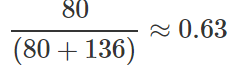

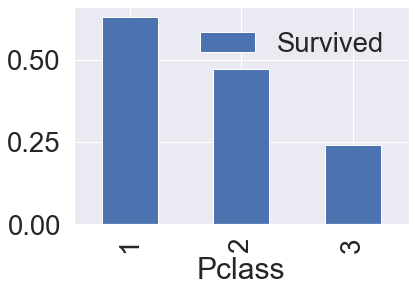

In [17]:
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index = True).mean().sort_values(
by='Survived',ascending = False).plot.bar()

* 좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn의 countplot을 이용하면, 특정 label 에 따른 개수를 확인해 볼 수 있습니다.

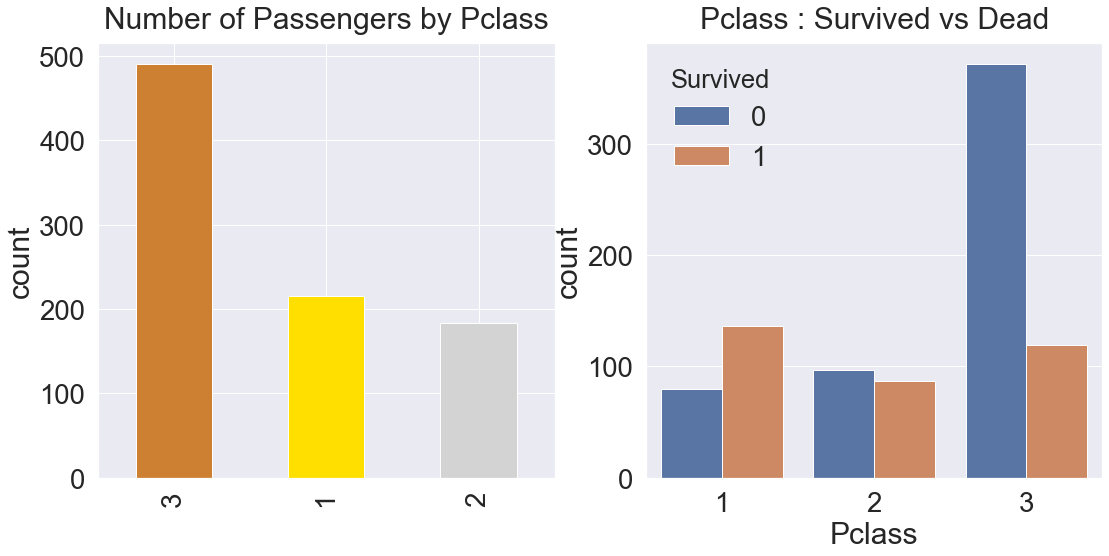

In [18]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass', y =y_position)
ax[0].set_ylabel('count')
sns.countplot('Pclass',hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)
plt.show()

## 2.2 Sex

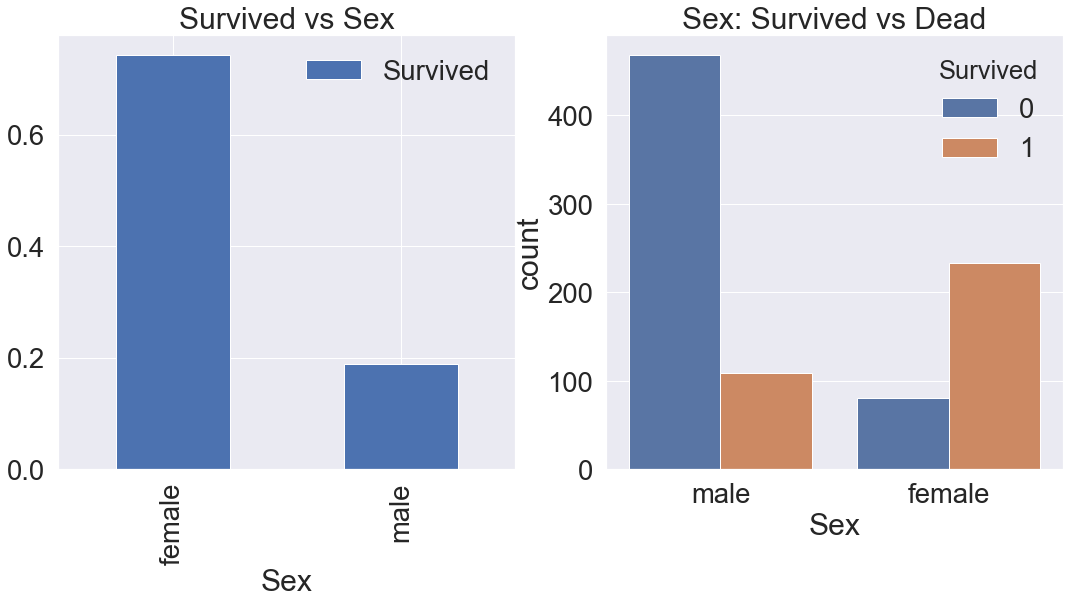

In [19]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train[['Sex','Survived']].groupby(['Sex'],as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [20]:
df_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by = 'Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
pd.crosstab(df_train['Sex'],df_train['Survived'],margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

* seaborn 의 factorplot을 이용하면, 손쉽게 3 차원 그래프를 그릴 수 있습니다.

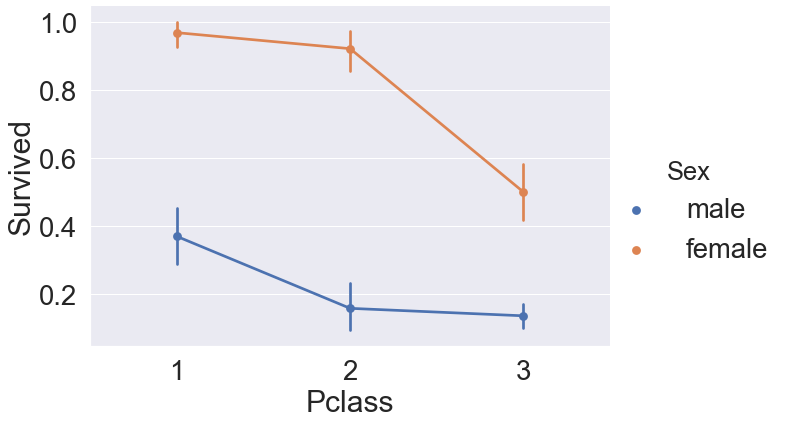

In [22]:
sns.factorplot('Pclass','Survived',hue = 'Sex',data =df_train,
              size =6, aspect = 1.5)

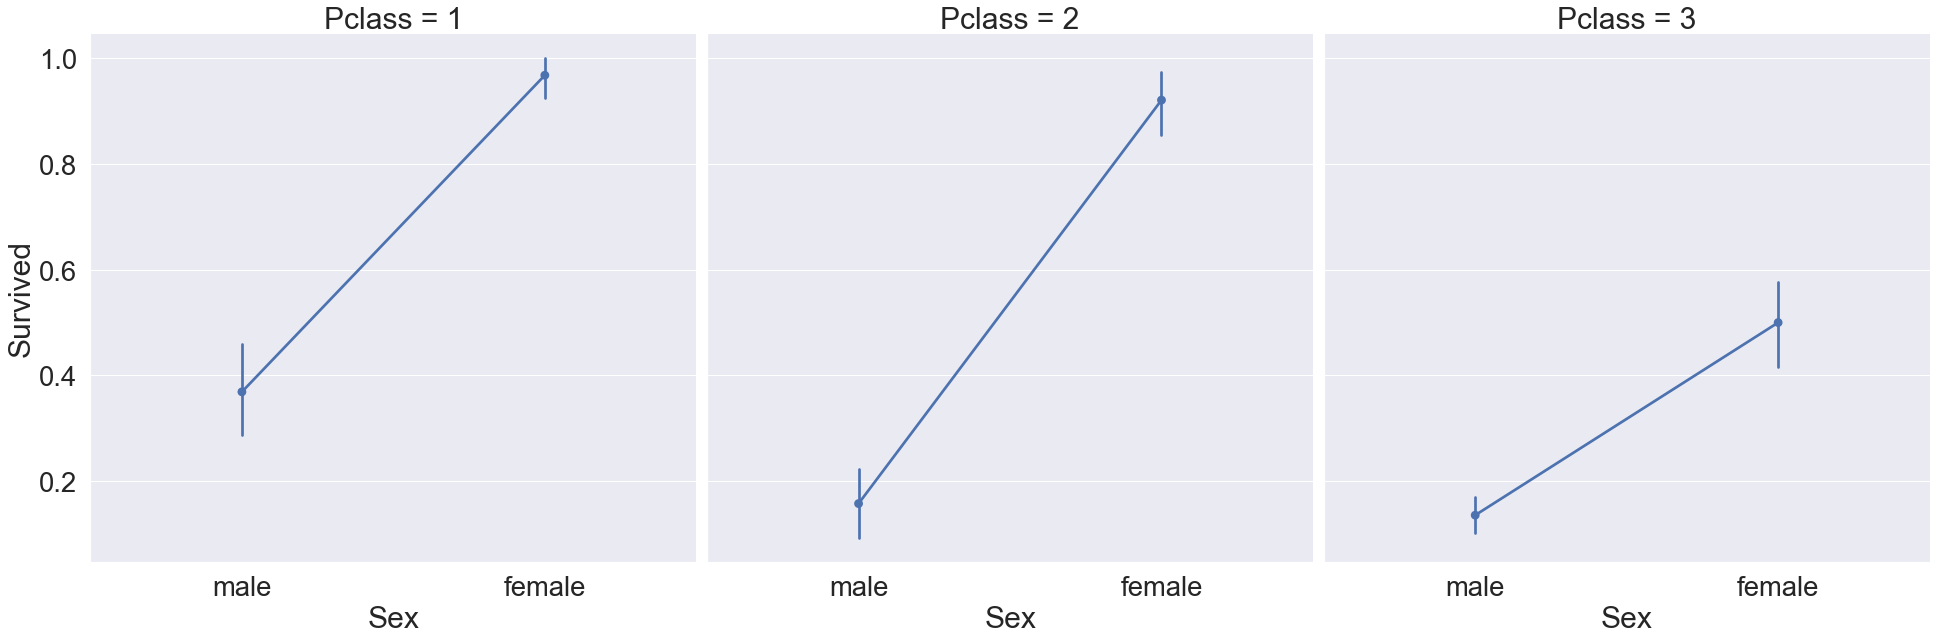

In [23]:
sns.factorplot(x = 'Sex', y ='Survived', col = 'Pclass',
              data = df_train, satureation =.5, size = 9 ,aspect = 1)

## 2.4 Age

In [24]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print(' 탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
 탑승객 평균 나이 : 29.7 years


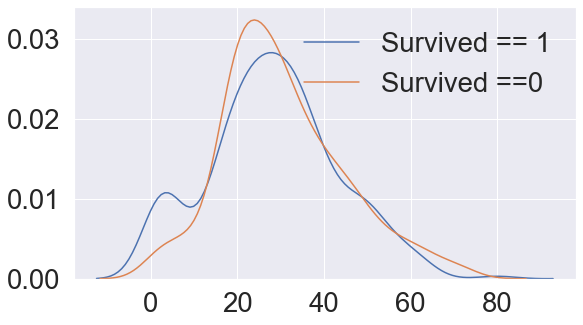

In [25]:
fig, ax = plt.subplots(1,1 ,figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived']== 1]['Age'],ax =ax)
sns.kdeplot(df_train[df_train['Survived']== 0]['Age'],ax = ax)
plt.legend(['Survived == 1','Survived ==0'])
plt.show()

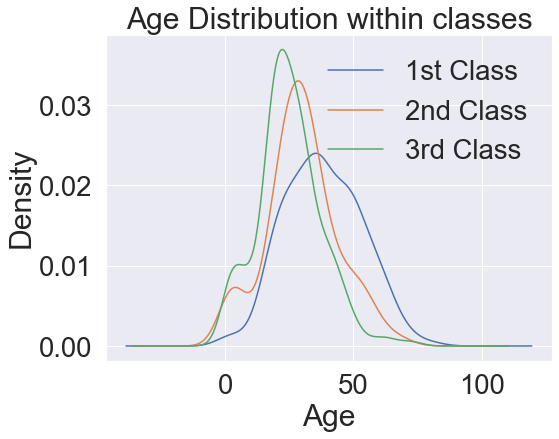

In [26]:
# Age distribution withing classes
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind= 'kde')
df_train['Age'][df_train['Pclass']==2].plot(kind= 'kde')
df_train['Age'][df_train['Pclass']==3].plot(kind= 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])

* 나이범위를 점점 넓혀 가면서, 생존률이 어떻게 되는 지 봅시다

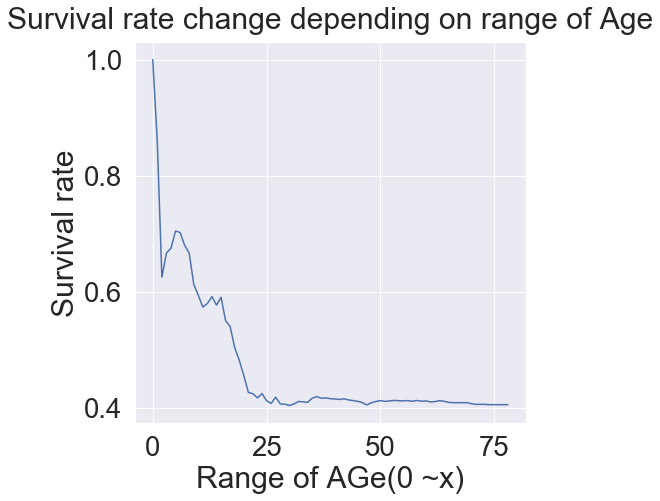

In [27]:
cummulate_survival_ratio = []
for i in range(1,80) :
    cummulate_survival_ratio.append(
    df_train[df_train['Age']<i]['Survived'].sum()/
    len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y =1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of AGe(0 ~x)')
plt.show()

## 2.5 Pcalss , Sex, Age

* x 축은 우리가 나눠서 보고싶어하는 case (여기선 Pclass, Sex) 를 나타내고, y축은 보고 싶어하는 distribution(Age) 입니다

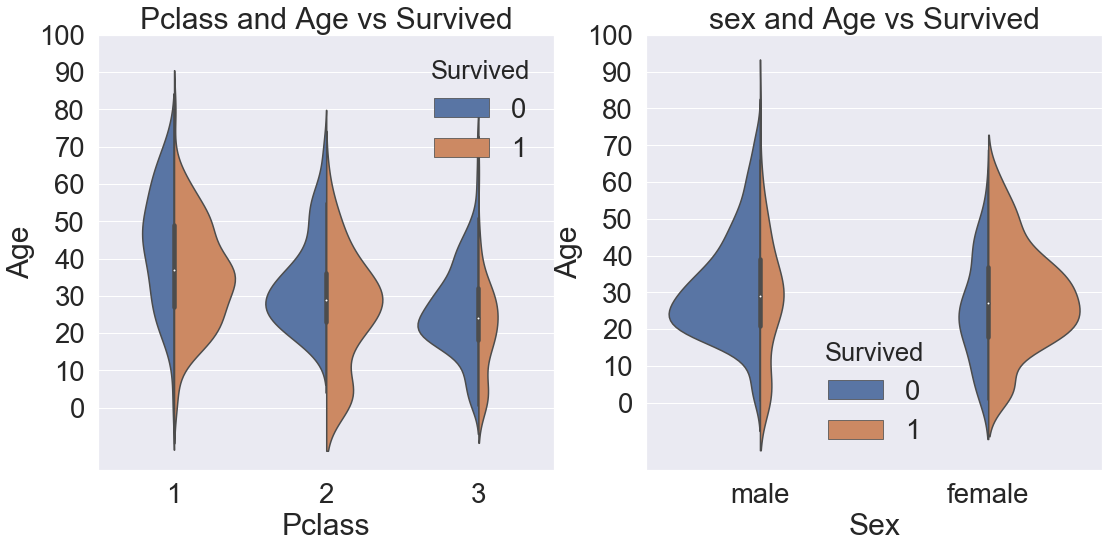

In [28]:
f, ax = plt.subplots(1,2, figsize = (18,8))
sns.violinplot('Pclass','Age',hue = "Survived",data = df_train, scale = 'count',split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')

ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue = "Survived",data = df_train, scale ='count', split = True, ax = ax[1])
ax[1].set_title("sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

## 2.6 Embarked 


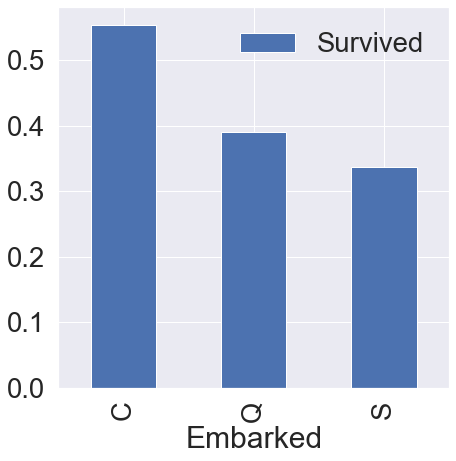

In [29]:
f, ax = plt.subplots(1,1, figsize = (7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index = True).mean().sort_values(by='Survived',ascending = False).plot.bar(ax = ax)

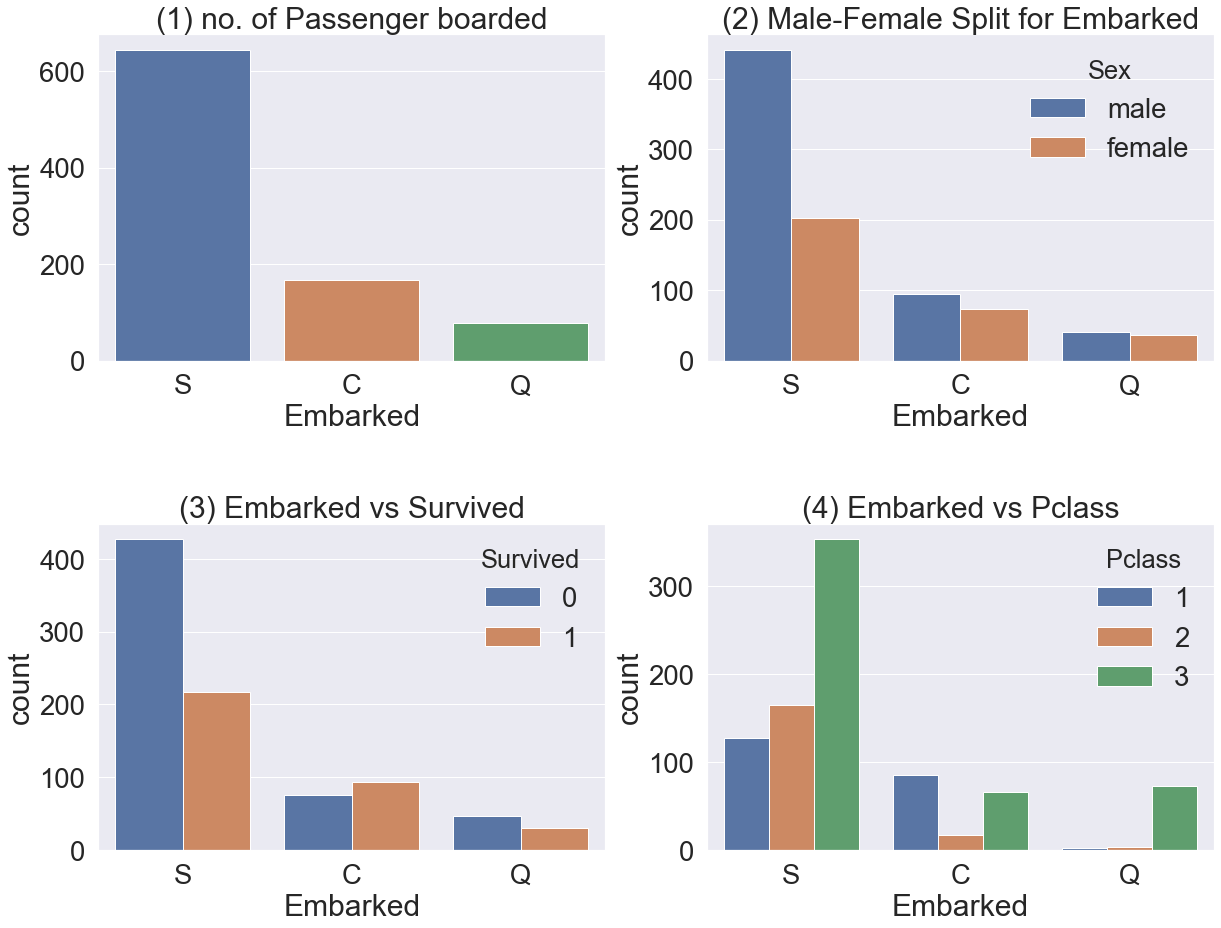

In [30]:
f, ax = plt.subplots(2,2, figsize = (20,15))
sns.countplot('Embarked',data = df_train, ax = ax[0,0])
ax[0,0].set_title('(1) no. of Passenger boarded')
sns.countplot('Embarked',hue = "Sex", data = df_train, ax = ax[0,1])

ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])

ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])

ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.2, hspace  = 0.5)
plt.show()

이 부분 잘못됐으뮤ㅠㅠㅠ 다음 번에 한 번 더 체크!

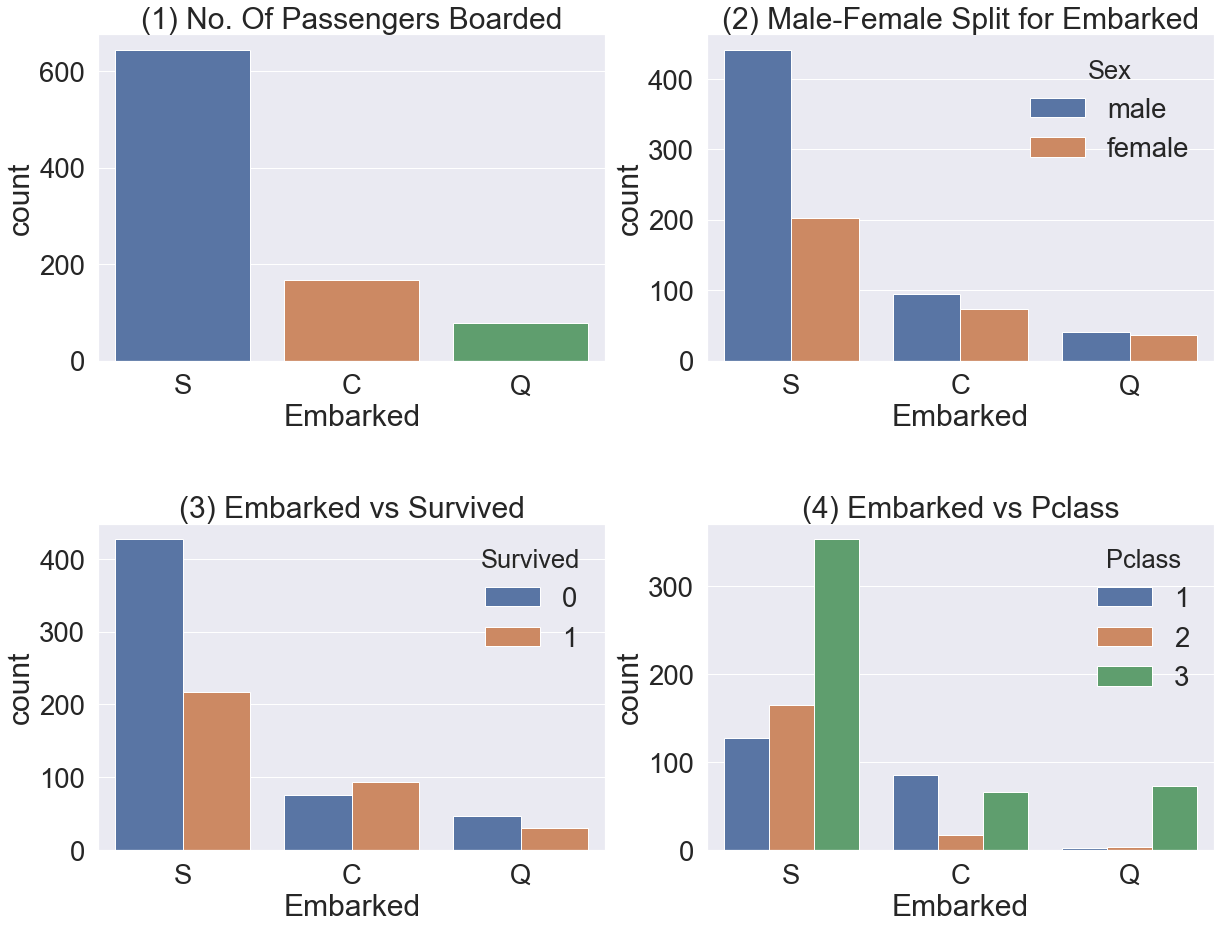

In [31]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.7 Family  - SibSp(형제 자매) + Parch(부모, 자녀)

In [32]:
# 자신을 포함해야 하니 1을 더합니다
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 

df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [33]:
print("Maxumum size of Family :",df_train['FamilySize'].max())
print("Minimum size of Family :",df_train['FamilySize'].min())

Maxumum size of Family : 11
Minimum size of Family : 1


* FamilySize 와 생존의 관계를 봅시다!

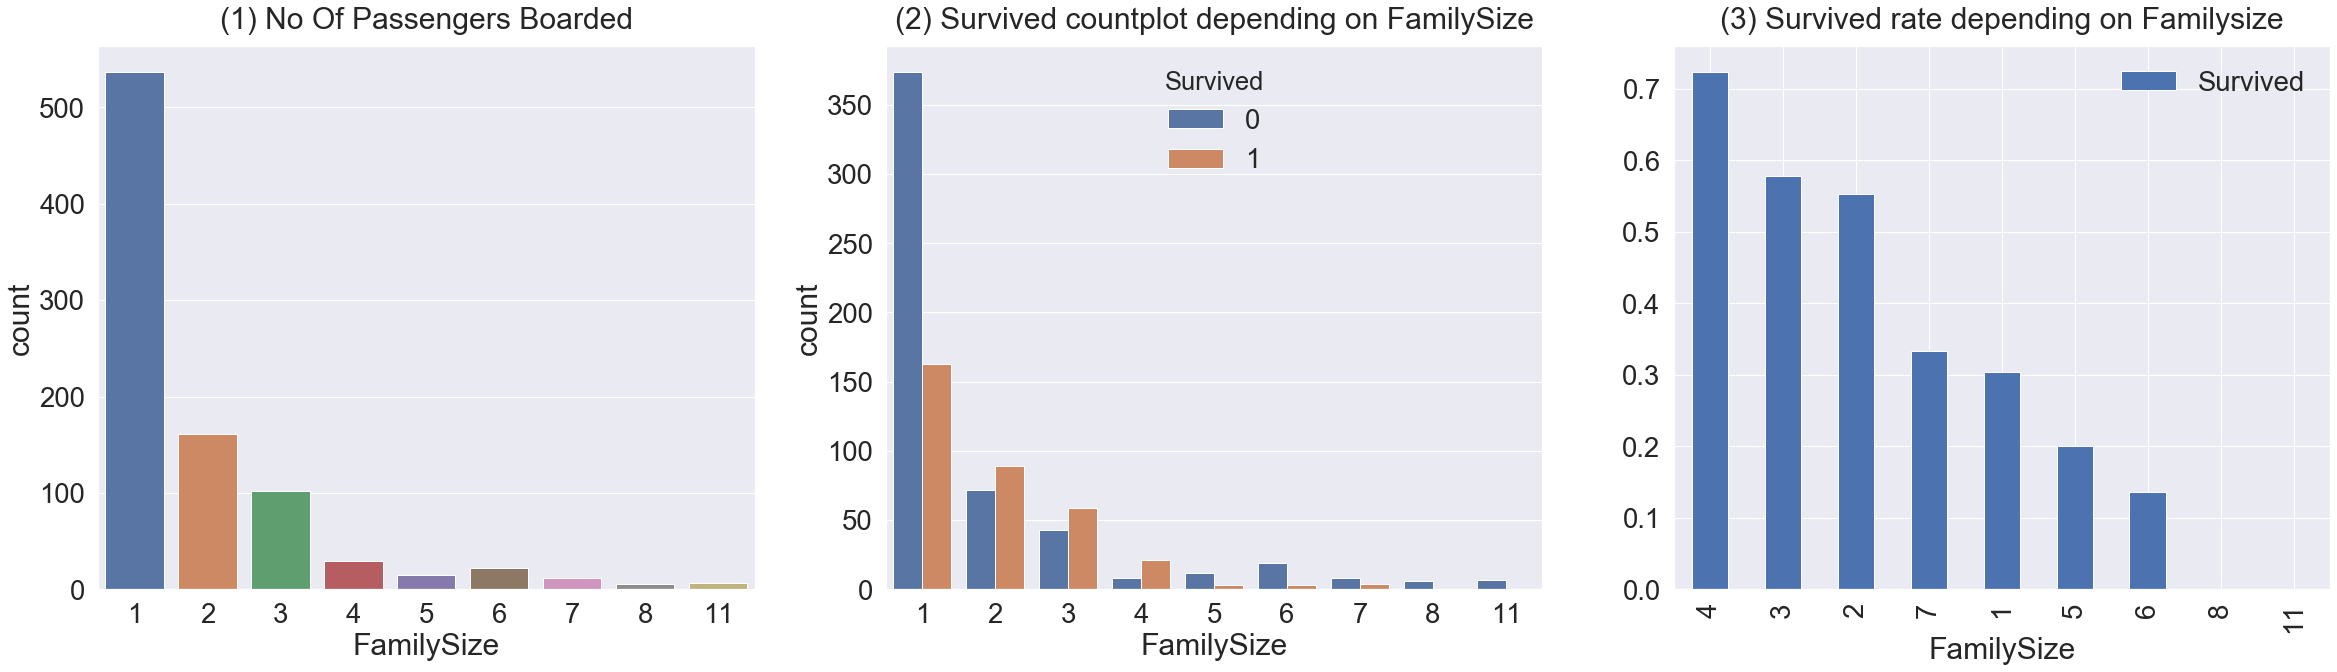

In [34]:
f, ax = plt.subplots(1,3, figsize = (40,10))
sns.countplot('FamilySize', data = df_train, ax =ax[0])
ax[0].set_title('(1) No Of Passengers Boarded', y= 1.02)

sns.countplot('FamilySize',hue = 'Survived', data= df_train, ax= ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y = 1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'],as_index= True).mean().sort_values(by = 'Survived',ascending = False).plot.bar(ax =ax[2])
ax[2].set_title("(3) Survived rate depending on Familysize", y = 1.02)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

가족 수가 4명일대 생존확률이 가장 높음. 

## 2.8 Fare

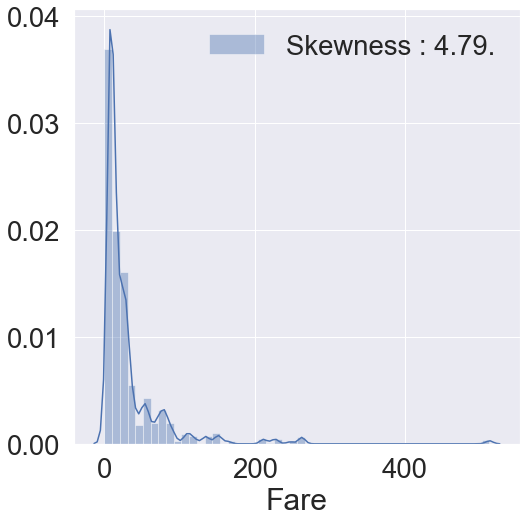

In [35]:
fig, ax = plt.subplots(1,1 , figsize = (8,8))
g = sns.distplot(df_train['Fare'],color = 'b', label = 'Skewness : {:.2f}.'.format(df_train['Fare'].skew()),ax =ax)
g = g.legend(loc = 'best')

* outlier의 영향을 줄이기 위해 Fare에 log를 취하겠습니다. 여기서 pandas의 유용한 기능을 사용합니다. dataFrame의 특정 columns에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply를 사용합니다. 간단한 labmda 함수 사용!

In [36]:
# test 데이터셋에 있는 null 값들을 평균값으로 채워줌
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

# log를 취해줌 왜? 비대칭이라서
# 이때 값이 0보다 작으면 그냥 0으로 해줌
df_train['Fare'] = df_train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

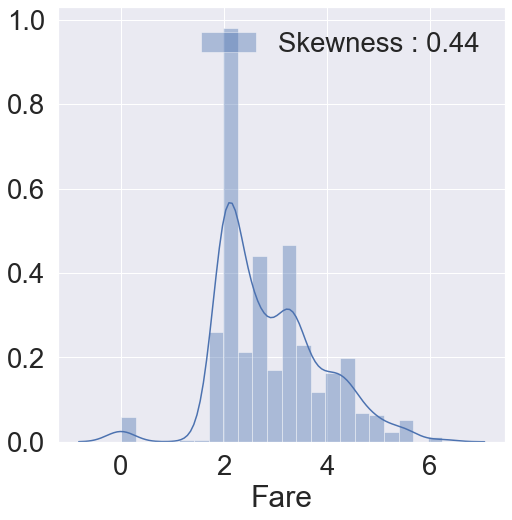

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

log를 취하니 비대칭성이 많이 없어졌습니다. => feature engineering

## 2.9 Cabin

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


Null 이 많이 때문에 out

## 2.10 Ticket

In [39]:
df_train['Ticket'].value_counts()

1601                 7
347082               7
CA. 2343             7
CA 2144              6
3101295              6
                    ..
SOTON/OQ 392090      1
330935               1
12460                1
PC 17603             1
STON/O 2. 3101285    1
Name: Ticket, Length: 681, dtype: int64

# 3. Feature engineering

* 가장 먼저, dataset 에 존재하는 null data를 채우려고 합니다.     
* null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어를 짜내어 채울 수 있습니다.    
* **`train` 뿐만 아니라 `test`도 똑같이 적용해주어야 합니다.**

## 3.1 Fill Null

### 3.1.1 Fill Null in Age using title

* Age 에는 null data가 177개가 있습니다. => 여기서 title + statistics를 사용해 보겠습니다.    
* 영어에서는 Ms, Mr, Mrs title이 존재합니다. 
* pandas series에는 data를 string으로 바꿔주는 str method, 거기에 정규표현식을 적용하게 해주는 extract method가 있습니다. 이를 사용하여 title을 쉽게 추출할 수 있습니다. title을 `initial column`에 저장하겠습니다.

In [40]:
# Lets extract the Scalutations
df_train['Initial']  = df_train.Name.str.extract('([A-Za-z]+)/.')

df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)/.')

위에는 내가 잘못 친 코드 / => \ 로 바꿔줘야 함!

In [41]:

df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
    
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

pandas의 crosstab을 이용하여 우리가 추출한 Initial과 Sex 간의 count를 살펴봅시다.

In [42]:
#checking the initials with the Sex
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


위 table을 참고하여, 남자, 여자가 쓰는 initial을 구분해 보겠습니다. replace 메소드를 사용하면, 특정 데이터 값을 원하는 값으로 치환해줍니다.

In [43]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev', 'Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace = True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev', 'Capt','Sir','Don','Dona'],
                           ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace = True)

In [44]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


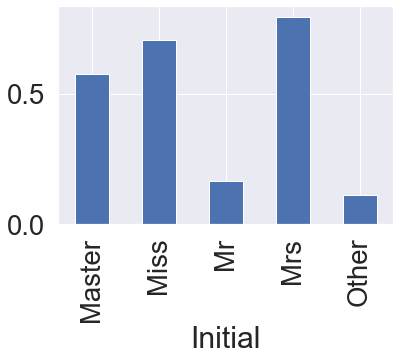

In [45]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

* 이제 본격적으로 Null을 채웁니다.     
* 여기서 statistics는 train data 의 것을 의미합니다. 우리는 언제나 test를 unseen으로 둬야 하며, train에서 얻은 statistics를 기반으로 test의 null data를 채워줘야 합니다.

In [46]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


* Age의 평균을 이용해 Null value를 채우도록 하겠습니다.   
* pandas dataframe을 다룰 때에는 boolean array을 이용해 indexing 하는 방법이 편합니다.


In [47]:
# isnull이면 Initial 이 Mr인 조건을 만족하는 row(탑승객)의  Age를 33으로 치환한다.
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial == 'Other'),'Age'] = 46

In [48]:
df_test.loc[(df_test.Age.isnull())&df_test.Initial =='Mr','Age']= 33
df_test.loc[(df_test.Age.isnull())&df_test.Initial =='Mrs','Age']= 36
df_test.loc[(df_test.Age.isnull())&df_test.Initial =='Miss','Age']= 22
df_test.loc[(df_test.Age.isnull())&df_test.Initial =='Master','Age']= 5
df_test.loc[(df_test.Age.isnull())&df_test.Initial =='Other','Age']= 46

**참고 https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 보시면서 공부해보세요!**

### 3.1.2 Fill Null in Embarked

In [49]:
print('Embarked has',sum(df_train['Embarked'].isnull()),'Null values')

Embarked has 2 Null values


In [50]:
# 2개 밖에 없으므로 간단하게 가장 많은 S로 채우겠습니다. 
df_train['Embarked'].fillna('S',inplace = True)

## 3.2 Change Age(continuous to categorical)

* Age를 몇 개의 group으로 나누어 category 화 시켜줄 수도 있습니다. 
  * 방법 1. dataframe indexing 방법인 loc 사용해서 직접
  * 방법 2. apply 함수로 넣어줌

In [51]:
# 첫번째 방법 사용 & 나이는 10살 간격으로 나눔
df_train['Age_cat'] = 0
df_train.loc[df_train['Age']<10,'Age_cat'] = 0
df_train.loc[(10<= df_train['Age'])&( df_train['Age']<20),'Age_cat'] = 1
df_train.loc[(20<= df_train['Age'])&( df_train['Age']<30),'Age_cat'] = 2
df_train.loc[(30<= df_train['Age'])&( df_train['Age']<40),'Age_cat'] = 3
df_train.loc[(40<= df_train['Age'])&( df_train['Age']<50),'Age_cat'] = 4
df_train.loc[(50<= df_train['Age'])&( df_train['Age']<60),'Age_cat'] = 5
df_train.loc[(60<= df_train['Age'])&( df_train['Age']<70),'Age_cat'] = 6
df_train.loc[70<= df_train['Age'],'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age']<10,'Age_cat'] = 0
df_test.loc[(10<= df_test['Age'])&( df_test['Age']<20),'Age_cat'] = 1
df_test.loc[(20<= df_test['Age'])&( df_test['Age']<30),'Age_cat'] = 2
df_test.loc[(30<= df_test['Age'])&( df_test['Age']<40),'Age_cat'] = 3
df_test.loc[(40<= df_test['Age'])&( df_test['Age']<50),'Age_cat'] = 4
df_test.loc[(50<= df_test['Age'])&( df_test['Age']<60),'Age_cat'] = 5
df_test.loc[(60<= df_test['Age'])&( df_test['Age']<70),'Age_cat'] = 6
df_test.loc[70<= df_test['Age'],'Age_cat'] = 7


In [52]:
# 두번째는 함수 apply를 이용해 넣어줍니다.
def category_age(x) :
    if x<10 :
        return 0
    elif x<20 :
        return 1
    elif x<30 :
        return 2
    elif x<40 :
        return 3
    elif x<50 :
        return 4
    elif x<60 :
        return 5
    elif x<70 :
        return 6
    else :
        return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

* 두가지 방법이 잘 적용됬다면, 둘다 같은 결과를 내야 합니다. 
* 이를 확인하기 위해 Series 간 boolean 비교후 all() 메소드를 사용합니다. all()메소드는 모든 값이 같으면 True, 다르면 False를 반환합니다.  

In [53]:
print('1번 방법, 2번 방법 둘 다 같은 결과 면 True :',(df_train['Age_cat']==(df_train['Age_cat_2'])).all())

1번 방법, 2번 방법 둘 다 같은 결과 면 True : True


In [54]:
# 중복되는 컬럼을 지우겠습니다.
df_train.drop(['Age','Age_cat_2'],axis = 1, inplace = True)
df_test.drop(['Age'],axis =1 ,inplace = True)

## 3.3 Change Initial, Embarked and Sex (string to numerical)

In [55]:
df_train['Initial'] = df_train['Initial'].map({'Master' : 0,'Miss' :1, 'Mr': 2, 'Mrs': 3,'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master' : 0,'Miss' :1, 'Mr': 2, 'Mrs': 3,'Other': 4})

In [56]:
# Embarked 도 C, Q, S로 이루어져 있습니다.    
# 그러기 앞서서, 특정 column에 어떤 값들이 있는 지 확인!

In [57]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [58]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [59]:
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0,'Q': 1,'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0,'Q': 1,'S':2})

In [60]:
# 이제 Null이 사라졌는 지 봅시다. Null이 하나라도 있을 시 = False
df_train['Embarked'].isnull().any()

False

In [61]:
#null 이 있으면 True
df_train['Embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [62]:
df_train['Sex'] = df_train['Sex'].map({'female':0,'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0,'male':1})

* 이제 각 변수간 상관관계를 한번 보겠습니다. 
* Pearson correlation을 구하면 (-1, 1)사이의 값이 나옵니다.
* -1로 갈수록 음의 상관관계 1로 갈수록 양의 상관관계, 0이면 관계없음    
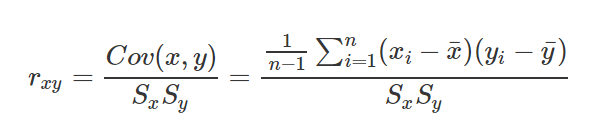
* 우리는 여러 feature를 가지고 있으니 이를 하나의 matrix 형태로 봅니다 => heatmap plot이라고 하며 dataframe 의 corr()메소드와 seaborn 을 가지고 편하게 그릴 수 있습니다.   

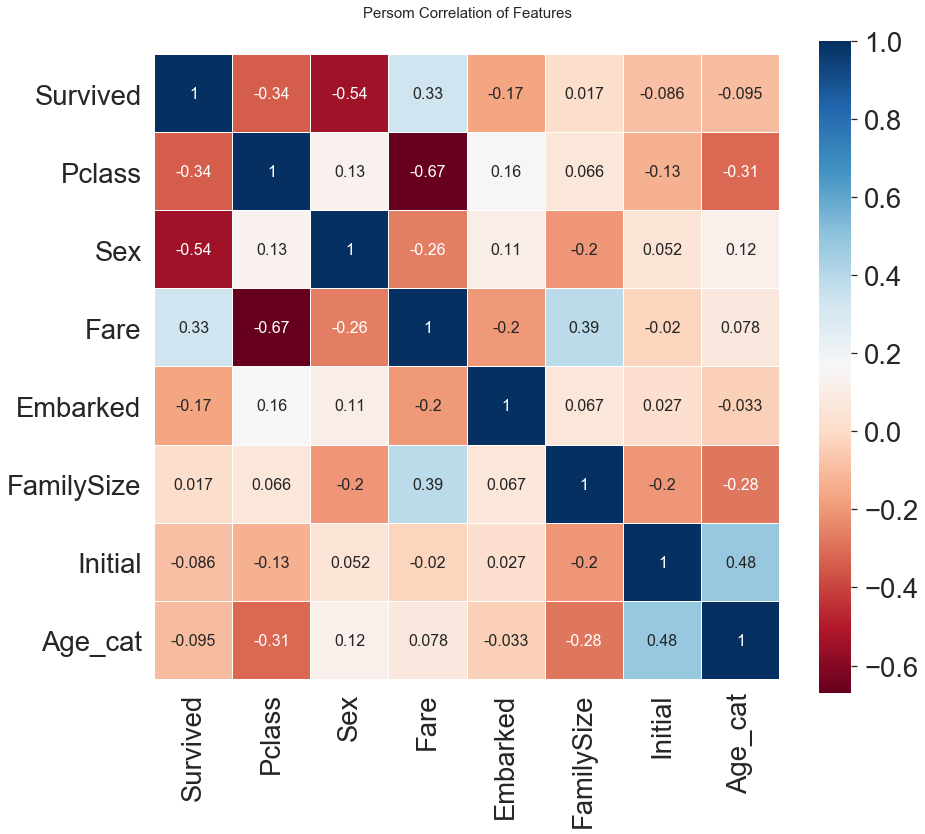

In [63]:
heatmap_data = df_train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize',
                        'Initial','Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize = (14,12))
plt.title('Persom Correlation of Features', y = 1.05,size =15)
sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1,vmax=1.0,
           square = True, cmap = colormap, linecolor ='white',annot= True,
           annot_kws = {'size':16})

del heatmap_data # 이게 뭐지? plot도 아니고

## 3.4 One-hot encoding on Initial and Embarked

* 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.
* 수치화는 간단히 Master == 0, Miss ==1, Mr==2, Mrs ==3, Other ==4 로 매핑해주는 것을 말합니다.   
* pandas의 get_dummies를 사용해서 쉽게 해결할 수 있습니다.  
* 총 5개의 카테고리니, one-hot encoding을 하고 나면 새로운 5개의 column이 생깁니다.    
* Initialdmf prefix로 두어서 구분이 쉽게 만들어줍니다.    

In [64]:
df_train = pd.get_dummies(df_train, columns = ['Initial'],prefix = 'Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'],prefix = 'Initial')

In [65]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [66]:
# Embarked에도 적용하겠습니다. Initial 때와 마찬가지로 one-hot encoding을 사용해 표현합니다.
df_train = pd.get_dummies(df_train, columns = ['Embarked'],prefix = 'Embarked')
df_test = pd.get_dummies(df_test, columns = ['Embarked'],prefix = 'Embarked')

In [67]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilySize', 'Age_cat', 'Initial_0',
       'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')

## 3.5 Drop columns

In [68]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis =1, inplace= True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis =1, inplace= True)


In [69]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [70]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


# 4. Building machine learning model and prediction using the trained model

In [71]:
#importing all the required ML packges
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 모델 평가를 위해
from sklearn.model_selection import train_test_split #training set을 쉽게 나눠주는 함수

## 4.1 Preparation - Split dataset into train, valid, test set 

In [72]:
# 가장 먼저, 학습에 쓰일 데이터와 target label을 분리합니다. 
X_train = df_train.drop('Survived',axis= 1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [73]:
test_1 = df_test

In [74]:
test_1.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


In [75]:
pd.to_numeric(test_1['Fare'])

0      2.057860
1      1.945910
2      2.270836
3      2.159003
4      2.508582
         ...   
413    2.085672
414    4.690430
415    1.981001
416    2.085672
417    3.107198
Name: Fare, Length: 418, dtype: float64

* valid set을 따로 만들어 모델 평가해보기

In [76]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, 
                                           test_size = 0.3, random_state = 2020)

## 4.2 Model generation and prediction

In [77]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [78]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0],100 *metrics.accuracy_score(prediction, y_vld)))

총 268명 중 81.72% 정확도로 생존을 맞춤


## 4.3 Feature importance

* 학습된 모델은 feature importance를 가지게 되는데 pandas series를 이용하면 쉽게 sorting하여 그래프를 그릴 수 있습니다.

In [79]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = df_test.columns)

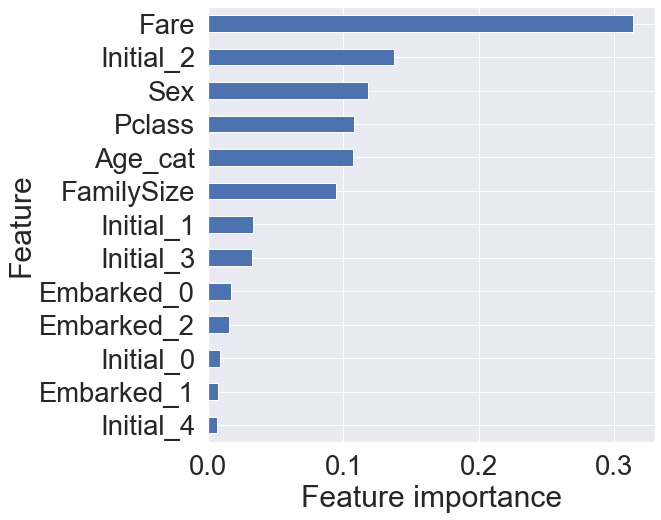

In [80]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

## 4.4 Prediction on Test set

In [81]:
submission = pd.read_csv('gender_submission.csv')

In [84]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [85]:
submission.to_csv('./my_first_submission.csv',index = False)